In [33]:
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('/home/ubertrader/Dropbox/tmqrexo/tmqrv')
sys.path.append('/home/ubertrader/Dropbox/tmqrexo/tmqrv/exobuilder/tests')

In [11]:
from exobuilder.contracts.futureschain import FuturesChain
from exobuilder.contracts.futurecontract import FutureContract
from exobuilder.tests.assetindexdict import AssetIndexDicts
from datetime import datetime, date
from exobuilder.contracts.instrument import Instrument
from exobuilder.data.datasource_mongo import DataSourceMongo
from exobuilder.data.assetindex_mongo import AssetIndexMongo
from exobuilder.data.exostorage import EXOStorage
from backtester.matlab import loaddata

## Initializing the data source

In [6]:
mongo_connstr = 'mongodb://localhost:27017/'
mongo_db_name = 'tmldb'

exostorage = EXOStorage(mongo_connstr, mongo_db_name)

## EXO Graph

In [37]:
exo = exostorage.load_series('ES_ContFut')
exo.index = pd.DatetimeIndex(map(lambda d: d.date(), exo.index))

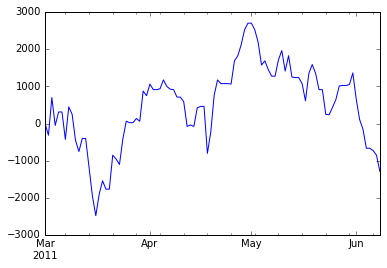

In [38]:
exo.plot()

In [39]:
df, exo_info = loaddata('/home/ubertrader/Downloads/strategy_260101.mat')

In [40]:
fut_price_mat = df['fut_price']

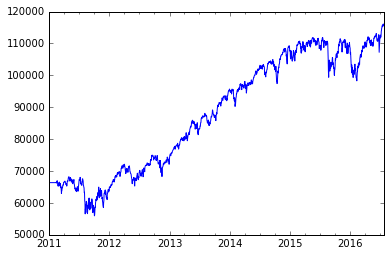

In [41]:
fut_price_mat.plot()

In [42]:
fut_mat_fitted = fut_price_mat.ix[exo.index[0]:exo.index[-1]]

In [51]:
fut_diff = fut_mat_fitted.diff().cumsum()
exo_diff = exo.diff().cumsum()

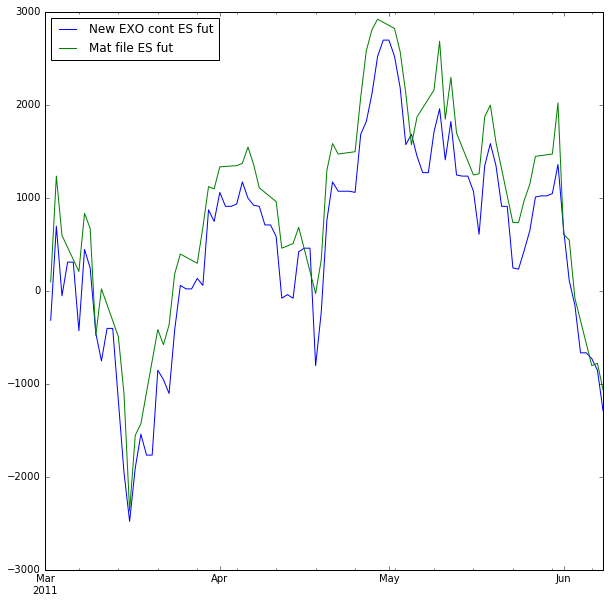

In [59]:
exo_diff.plot(label='New EXO cont ES fut')
fut_diff.plot(label='Mat file ES fut')
legend(loc=2)
figsize(15, 15)